# Evolution of the atmospheric CO$_2$ concentration since 1958

Data obtained [here](https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/monthly/monthly_in_situ_co2_mlo.csv)


## Import Data
Check if the DATA has already been downloaded to avoid downloading at every execution. If not, it download it and import it.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from os.path import exists

In [2]:
data_url = "https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/monthly/monthly_in_situ_co2_mlo.csv"

#boo Check if file has already been downloaded to not download the data at every execution
boo=exists("DATA.csv")

if boo:
    raw_data=raw_data = pd.read_csv("DATA.csv")
else: 
    raw_data = pd.read_csv(data_url,skiprows=57)
    raw_data.to_csv("DATA.csv")

raw_data


Unnamed: 0    Yr   Mn      Date         Date       CO2  seasonally  \
0             0                                                adjusted   
1             1                Excel                  [ppm]      [ppm]    
2             2  1958   01     21200    1958.0411    -99.99      -99.99   
3             3  1958   02     21231    1958.1260    -99.99      -99.99   
4             4  1958   03     21259    1958.2027    315.71      314.44   
5             5  1958   04     21290    1958.2877    317.45      315.16   
6             6  1958   05     21320    1958.3699    317.51      314.69   
7             7  1958   06     21351    1958.4548    -99.99      -99.99   
8             8  1958   07     21381    1958.5370    315.87      315.20   
9             9  1958   08     21412    1958.6219    314.93      316.21   
10           10  1958   09     21443    1958.7068    313.21      316.11   
11           11  1958   10     21473    1958.7890    -99.99      -99.99   
12           12  1958   11     21504    1958.8740    313.33      315.21   
13           13  1958   12     21534    1958.9562    314.67      315.43   
14           14  1959   01     21565    1959.0411    315.58      315.52   
15           15  1959   02     21596    1959.1260    316.49      315.84   
16           16  1959   03     21624    1959.2027    316.65      315.38   
17           17  1959   04     21655    1959.2877    317.72      315.42   
18           18  1959   05     21685    1959.3699    318.29      315.46   
19           19  1959   06     21716    1959.4548    318.15      316.00   
20           20  1959   07     21746    1959.5370    316.54      315.87   
21           21  1959   08     21777    1959.6219    314.80      316.09   
22           22  1959   09     21808    1959.7068    313.84      316.75   
23           23  1959   10     21838    1959.7890    313.33      316.34   
24           24  1959   11     21869    1959.8740    314.81      316.69   
25           25  1959   12     21899    1959.9562    315.58      316.35   
26           26  1960   01     21930    1960.0410    316.43      316.37   
27           27  1960   02     21961    1960.1257    316.98      316.33   
28           28  1960   03     21990    1960.2049    317.58      316.28   
29           29  1960   04     22021    1960.2896    319.03      316.70   
..          ...   ...  ...       ...          ...       ...         ...   
764         764  2021   07     44392    2021.5370    416.65      415.85   
765         765  2021   08     44423    2021.6219    414.34      415.89   
766         766  2021   09     44454    2021.7068    412.90      416.40   
767         767  2021   10     44484    2021.7890    413.55      417.16   
768         768  2021   11     44515    2021.8740    414.82      417.08   
769         769  2021   12     44545    2021.9562    416.43      417.36   
770         770  2022   01     44576    2022.0411    418.01      417.94   
771         771  2022   02     44607    2022.1260    418.99      418.21   
772         772  2022   03     44635    2022.2027    418.45      416.92   
773         773  2022   04     44666    2022.2877    420.02      417.25   
774         774  2022   05     44696    2022.3699    420.77      417.36   
775         775  2022   06     44727    2022.4548    420.68      418.09   
776         776  2022   07     44757    2022.5370    418.68      417.87   
777         777  2022   08     44788    2022.6219    416.76      418.31   
778         778  2022   09     44819    2022.7068    415.41      418.91   
779         779  2022   10     44849    2022.7890    415.31      418.93   
780         780  2022   11     44880    2022.8740    417.04      419.31   
781         781  2022   12     44910    2022.9562    418.57      419.49   
782         782  2023   01     44941    2023.0411    419.24      419.17   
783         783  2023   02     44972    2023.1260    420.33      419.55   
784         784  2023   03     45000    2023.2027    420.51      418.97   
785         785  2023   04    

##  Data formatting

The raw data is not ready for analysis. 
The two first lines are used to comment the rows:
- **Line 0:** used to comment the nature of the row
- **Line 1:** used to comment the unit of the row

We start by deleting the two lines:

In [3]:
raw_data[raw_data.isnull().any(axis=1)]

Unnamed: 0    Yr   Mn      Date        Date       CO2  seasonally  \
0           0                                               adjusted   
1           1                Excel                 [ppm]      [ppm]    

           fit    seasonally           CO2       seasonally  Sta  
0               adjusted fit        filled  adjusted filled  NaN  
1        [ppm]         [ppm]         [ppm]            [ppm]  NaN

In [4]:
data = raw_data.dropna().copy()
data

Unnamed: 0    Yr   Mn      Date         Date       CO2 seasonally  \
2             2  1958   01     21200    1958.0411    -99.99     -99.99   
3             3  1958   02     21231    1958.1260    -99.99     -99.99   
4             4  1958   03     21259    1958.2027    315.71     314.44   
5             5  1958   04     21290    1958.2877    317.45     315.16   
6             6  1958   05     21320    1958.3699    317.51     314.69   
7             7  1958   06     21351    1958.4548    -99.99     -99.99   
8             8  1958   07     21381    1958.5370    315.87     315.20   
9             9  1958   08     21412    1958.6219    314.93     316.21   
10           10  1958   09     21443    1958.7068    313.21     316.11   
11           11  1958   10     21473    1958.7890    -99.99     -99.99   
12           12  1958   11     21504    1958.8740    313.33     315.21   
13           13  1958   12     21534    1958.9562    314.67     315.43   
14           14  1959   01     21565    1959.0411    315.58     315.52   
15           15  1959   02     21596    1959.1260    316.49     315.84   
16           16  1959   03     21624    1959.2027    316.65     315.38   
17           17  1959   04     21655    1959.2877    317.72     315.42   
18           18  1959   05     21685    1959.3699    318.29     315.46   
19           19  1959   06     21716    1959.4548    318.15     316.00   
20           20  1959   07     21746    1959.5370    316.54     315.87   
21           21  1959   08     21777    1959.6219    314.80     316.09   
22           22  1959   09     21808    1959.7068    313.84     316.75   
23           23  1959   10     21838    1959.7890    313.33     316.34   
24           24  1959   11     21869    1959.8740    314.81     316.69   
25           25  1959   12     21899    1959.9562    315.58     316.35   
26           26  1960   01     21930    1960.0410    316.43     316.37   
27           27  1960   02     21961    1960.1257    316.98     316.33   
28           28  1960   03     21990    1960.2049    317.58     316.28   
29           29  1960   04     22021    1960.2896    319.03     316.70   
30           30  1960   05     22051    1960.3716    320.03     317.20   
31           31  1960   06     22082    1960.4563    319.58     317.45   
..          ...   ...  ...       ...          ...       ...        ...   
764         764  2021   07     44392    2021.5370    416.65     415.85   
765         765  2021   08     44423    2021.6219    414.34     415.89   
766         766  2021   09     44454    2021.7068    412.90     416.40   
767         767  2021   10     44484    2021.7890    413.55     417.16   
768         768  2021   11     44515    2021.8740    414.82     417.08   
769         769  2021   12     44545    2021.9562    416.43     417.36   
770         770  2022   01     44576    2022.0411    418.01     417.94   
771         771  2022   02     44607    2022.1260    418.99     418.21   
772         772  2022   03     44635    2022.2027    418.45     416.92   
773         773  2022   04     44666    2022.2877    420.02     417.25   
774         774  2022   05     44696    2022.3699    420.77     417.36   
775         775  2022   06     44727    2022.4548    420.68     418.09   
776         776  2022   07     44757    2022.5370    418.68     417.87   
777         777  2022   08     44788    2022.6219    416.76     418.31   
778         778  2022   09     44819    2022.7068    415.41     418.91   
779         779  2022   10     44849    2022.7890    415.31     418.93   
780         780  2022   11     44880    2022.8740    417.04     419.31   
781         781  2022   12     44910    2022.9562    418.57     419.49   
782         782  2023   01     44941    2023.0411    419.24     419.17   
783         783  2023   02     44972    2023.1260    420.33     419.55   
784         784  2023   03     45000    2023.2027    420.51     418.97   
785         785  2023   04     45031    2023.2877    422.73     419.95   
786      

We now need to convert the data from string to float in order to plot it.

**`data.keys()`** gives us the name of each row which allow us to treat the data row by row. 

In [5]:
data.keys()

Index(['Unnamed: 0', '  Yr', ' Mn', '    Date', '      Date', '     CO2',
       'seasonally', '        fit', '  seasonally', '      CO2', ' seasonally',
       ' Sta'],
      dtype='object')

In [6]:
data["      Date"]=[float(element) for element in data['      Date']]
x=data["      Date"]

data["     CO2"]=[float(element) for element in data['     CO2']]
y=data["     CO2"]

## Plotting the data

We are now able to plot the CO$_2$ concentration for every years.

<function matplotlib.pyplot.show(*args, **kw)>

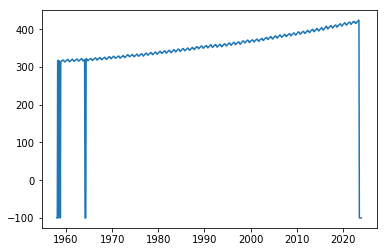

In [7]:
plt.plot(x,y)
plt.show

**We can see that some missing values are represented by the -99.99 value.**

Before we can continue, we need to delete this values:

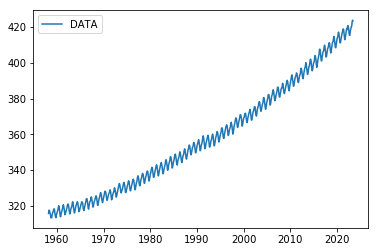

In [8]:
def cleandata(element):
    newvalue=element
    if(element==-99.99):
        newvalue=np.nan
    return newvalue

data["     CO2"]=[cleandata(element) for element in data['     CO2']]
datacleaned = data.dropna().copy()
data
x2=datacleaned["      Date"]
y2=datacleaned["     CO2"]
plt.plot(x2,y2,label="DATA")
plt.legend()
plt.show;

## Analysis

As shown in the previous plot, we can see a *high* frequency oscillation coupled to a slow increase.

For the analysis, we want to isolate the oscilating contributionn from the continuous curve. For that we **assume** that this slow curve can be described by a square function with three parameters: $f(x)=a.x^2+b.x+c$

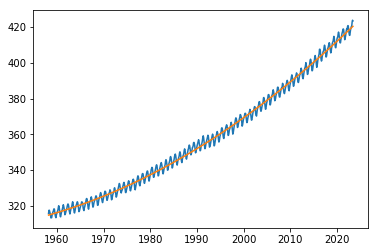

In [9]:
from scipy.optimize import curve_fit

def fitfunc(x, a, b, c):
    return a*x*x+b*x + c

popt,pcov=curve_fit(fitfunc,x2,y2)
plt.figure()
plt.plot(x2,y2,label="DATA")
plt.plot(x2,fitfunc(x2,*popt),label="Fit")

In **first approximation** we can say that this square fit is matching well the experimental data.

We can ensure this claim by isolating the oscilating contribution which should oscilate around 0.

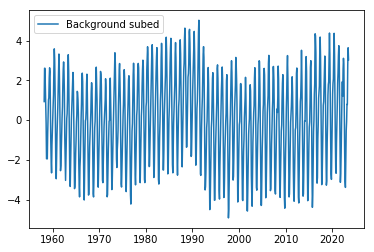

In [10]:
plt.figure()
plt.plot(x2,y2-fitfunc(x2,*popt),label="Background subed")
plt.legend()
plt.show()

## Result of the extrapolation

Now that we are conviced by the $x^2$ fit, we can extrapolate the data for the year 2025.

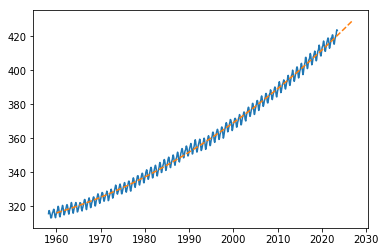

In [11]:
plt.figure()
plt.plot(x2,y2,label="DATA")
plt.plot(np.linspace(1960,2027,200),fitfunc(np.linspace(1960,2027,200),*popt),label="Fit Extrapolation",ls="--")

**The extrapolation would indicate a concentration around 424.246 $[$ppm$]$** in 2025